# Assignment 0
**Instrunctions for the assignment** \\

*   Open Google Colab: Begin by launching Google Colab and creating a new Python notebook.
*   Read Comments Carefully: Pay close attention to the comments provided within the codeblocks.


*   Code Block Completion: Fill in the codeblocks as per the instructions given in the comments.
*   Avoid Copying: Ensure that you understand the concepts and refrain from directly copying code from external sources.


*   Execute Codeblocks: Verify that each codeblock runs without errors by executing them.
*   Save and Submit: Once you've completed the assignment, save your notebook and follow the submission guidelines provided by your instructor.










**Notes:**

Encouragement: Take your time to understand the concepts behind each codeblock. This assignment aims to strengthen your Python programming skills. \\
Good Luck! : If you have any questions or require clarification on any aspect of the instructions, feel free to ask. \\
 \\

Best wishes for your assignment! These instructions are crafted to provide clarity and guidance as you work through the tasks in Google Colab.









## Getting Started
Solving these exercises will help make you a better programmer. Solve them in order, because each solution builds scaffolding, working code, and knowledge you can use on future problems. Read the directions carefully, and have fun!



*   To save your work to your Google Drive, go to File then "Save Copy in Drive".
*   Your own work will now appear in your Google Drive account!
*   Work on this copy as directed

## What to do when you don't know what to do next
- When the exercise asks you to reverse an list, the way forward is to search for "How to reverse a list in Python" in your favorite search engine.
- When the exercise asks you to check if a number is even, the way forward is to search for "how to check if a number is even in Python".
- When the exercise has you calculate the area of a circle, the way forward is to search for "how to calculate the area of a circle in Python" or "How to get pi in Python".

😀😀

## Basic Python Exercises

1. Create a new list from two list \\
list1 = [10, 20, 25, 30, 35] \\
list2 = [40, 45, 60, 75, 90]

In [ ]:
list1 = [10, 20, 25, 30, 35]
list2 = [40, 45, 60, 75, 90]
newlist=list1 + list2
print(newlist)

[10, 20, 25, 30, 35, 40, 45, 60, 75, 90]


2. Print multiplication table from 1 to 10

In [ ]:
for i in range(10):
  for j in range(1,11):
     print(i+1,"*",j,"=",(i+1)*j)

1 * 1 = 1
1 * 2 = 2
1 * 3 = 3
1 * 4 = 4
1 * 5 = 5
1 * 6 = 6
1 * 7 = 7
1 * 8 = 8
1 * 9 = 9
1 * 10 = 10
2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10
2 * 6 = 12
2 * 7 = 14
2 * 8 = 16
2 * 9 = 18
2 * 10 = 20
3 * 1 = 3
3 * 2 = 6
3 * 3 = 9
3 * 4 = 12
3 * 5 = 15
3 * 6 = 18
3 * 7 = 21
3 * 8 = 24
3 * 9 = 27
3 * 10 = 30
4 * 1 = 4
4 * 2 = 8
4 * 3 = 12
4 * 4 = 16
4 * 5 = 20
4 * 6 = 24
4 * 7 = 28
4 * 8 = 32
4 * 9 = 36
4 * 10 = 40
5 * 1 = 5
5 * 2 = 10
5 * 3 = 15
5 * 4 = 20
5 * 5 = 25
5 * 6 = 30
5 * 7 = 35
5 * 8 = 40
5 * 9 = 45
5 * 10 = 50
6 * 1 = 6
6 * 2 = 12
6 * 3 = 18
6 * 4 = 24
6 * 5 = 30
6 * 6 = 36
6 * 7 = 42
6 * 8 = 48
6 * 9 = 54
6 * 10 = 60
7 * 1 = 7
7 * 2 = 14
7 * 3 = 21
7 * 4 = 28
7 * 5 = 35
7 * 6 = 42
7 * 7 = 49
7 * 8 = 56
7 * 9 = 63
7 * 10 = 70
8 * 1 = 8
8 * 2 = 16
8 * 3 = 24
8 * 4 = 32
8 * 5 = 40
8 * 6 = 48
8 * 7 = 56
8 * 8 = 64
8 * 9 = 72
8 * 10 = 80
9 * 1 = 9
9 * 2 = 18
9 * 3 = 27
9 * 4 = 36
9 * 5 = 45
9 * 6 = 54
9 * 7 = 63
9 * 8 = 72
9 * 9 = 81
9 * 10 = 90
10 * 1 = 10
10 * 2 = 20


3. Print a downward Half-Pyramid Pattern

0 0 0 0 0   
0 0 0 0 <br>
0 0 0 <br>
0 0 <br>
0

In [ ]:
rows = 5

for i in range(rows, 0, -1):
    print("0 " * i)


0 0 0 0 0 
0 0 0 0 
0 0 0 
0 0 
0 


 4. Given the following assignment of the vegetables list, add "tomato" to the end of the list and sort them in alphabetical order.\
vegetables = ["eggplant", "broccoli", "carrot","cauliflower", "zucchini"]

In [ ]:
vegetables = ["eggplant", "broccoli", "carrot","cauliflower", "zucchini"]
vegetables.append("tomato")
vegetables.sort()
print(vegetables)

['broccoli', 'carrot', 'cauliflower', 'eggplant', 'tomato', 'zucchini']


5. Write a function definition named is_odd that takes in a number and returns True or False if that number is odd.

In [ ]:
def is_odd(num):
  if num%2!=0:
    return True
  else:
    return False
is_odd(7)


True

6. Write a function definition named mode that takes in sequence of numbers and returns the most commonly occuring value

In [ ]:
def mode(numbers):
    frequency = {}
    for num in numbers:
        if num in frequency:
            frequency[num] += 1
        else:
            frequency[num] = 1

    max_count = 0
    mode_value = None

    for num, count in frequency.items():
        if count > max_count:
            max_count = count
            mode_value = num

    return mode_value


## Numpy Exercises

Exercise 1: Create a 4X2 integer array and Prints its attributes \\
**Note:** The element must be a type of unsigned int16. \\
And print the following Attributes: –



1.   The shape of an array.
2.   Array dimensions.
3.   The Length of each element of the array in bytes.







In [ ]:

import numpy as np
array_2d = np.array([[1, 2], [3, 4], [5, 6], [7, 8]], dtype=np.uint16)
print("Shape of the array:", array_2d.shape)
print("Array dimensions:", array_2d.ndim)
print("Length of each element in bytes:", array_2d.itemsize)

Shape of the array: (4, 2)
Array dimensions: 2
Length of each element in bytes: 2


Exercise 2: Following is the provided numPy array. Return array of items by taking the third column from all rows \\
sampleArray = numpy.array ( [ [ 11 ,22, 33 ], [ 44, 55, 66 ], [ 77, 88, 99 ] ] )

In [ ]:

import numpy as np
sampleArray = np.array ( [ [ 11 ,22, 33 ], [ 44, 55, 66 ], [ 77, 88, 99 ] ] )
third_column = sampleArray[:, 2]
third_column

array([33, 66, 99])

Exercise 3: Sort following NumPy array \\
Case 1: Sort array by the second row \\
Case 2: Sort the array by the second column

In [ ]:

import numpy as np
numpyArray = np.array([[10, 40, 30],
                       [60, 20, 50],
                       [70, 90, 80]])
sort_indices_row = np.argsort(numpyArray[1, :])
sorted_by_second_row = numpyArray[:, sort_indices_row]
print("Sorted by the second row:\n", sorted_by_second_row)

sort_indices_col = np.argsort(numpyArray[:, 1])
sorted_by_second_col = numpyArray[sort_indices_col, :]
print("\nSorted by the second column:\n", sorted_by_second_col)


Sorted by the second row:
 [[40 30 10]
 [20 50 60]
 [90 80 70]]

Sorted by the second column:
 [[60 20 50]
 [10 40 30]
 [70 90 80]]


## Pandas Exercises
In this exercise, we are using Automobile Dataset for data analysis. This Dataset has different characteristics of an auto such as body-style, wheel-base, engine-type, price, mileage, horsepower, etc. \\
https://pynative.com/wp-content/uploads/2019/01/Automobile_data.csv

Exercise 1: From the given dataset print the first and last five rows.

In [ ]:

import pandas as pd
!wget https://pynative.com/wp-content/uploads/2019/01/Automobile_data.csv

df = pd.read_csv('Automobile_data.csv')

print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

--2025-05-20 13:05:25--  https://pynative.com/wp-content/uploads/2019/01/Automobile_data.csv
Resolving pynative.com (pynative.com)... 172.66.43.37, 172.66.40.219, 2606:4700:3108::ac42:28db, ...
Connecting to pynative.com (pynative.com)|172.66.43.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3208 (3.1K) [text/csv]
Saving to: ‘Automobile_data.csv’

Automobile_data.csv 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-05-20 13:05:25 (47.2 MB/s) - ‘Automobile_data.csv’ saved [3208/3208]

First 5 rows:
   index      company   body-style  wheel-base  length engine-type  \
0      0  alfa-romero  convertible        88.6   168.8        dohc   
1      1  alfa-romero  convertible        88.6   168.8        dohc   
2      2  alfa-romero    hatchback        94.5   171.2        ohcv   
3      3         audi        sedan        99.8   176.6         ohc   
4      4         audi        sedan        99.4   176.6         ohc   

  num-of-cylinders  horsepowe

Exercise 2: Replace all column values which contain ?, n.a, or NaN with suitable values and print the updated dataset.:

In [ ]:

import pandas as pd
!wget https://pynative.com/wp-content/uploads/2019/01/Automobile_data.csv

df = pd.read_csv('Automobile_data.csv')

df.replace(['?', 'n.a'], pd.NA, inplace=True)

df = df.apply(pd.to_numeric, errors='ignore')
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

print(df)


--2025-05-20 13:21:40--  https://pynative.com/wp-content/uploads/2019/01/Automobile_data.csv
Resolving pynative.com (pynative.com)... 172.66.40.219, 172.66.43.37, 2606:4700:3108::ac42:2b25, ...
Connecting to pynative.com (pynative.com)|172.66.40.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3208 (3.1K) [text/csv]
Saving to: ‘Automobile_data.csv.3’

Automobile_data.csv 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-05-20 13:21:40 (37.1 MB/s) - ‘Automobile_data.csv.3’ saved [3208/3208]

    index      company   body-style  wheel-base  length engine-type  \
0       0  alfa-romero  convertible        88.6   168.8        dohc   
1       1  alfa-romero  convertible        88.6   168.8        dohc   
2       2  alfa-romero    hatchback        94.5   171.2        ohcv   
3       3         audi        sedan        99.8   176.6         ohc   
4       4         audi        sedan        99.4   176.6         ohc   
..    ...          ...          .

<ipython-input-19-5b1a4f17b60b>:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
<ipython-input-19-5b1a4f17b60b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-19-5b1a4f17b60b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inpla

Exercise 5: Count total cars per company and print them




In [ ]:
import pandas as pd
!wget https://pynative.com/wp-content/uploads/2019/01/Automobile_data.csv
df = pd.read_csv('Automobile_data.csv')
car_counts=df['company'].value_counts()
print(car_counts)

--2025-05-20 13:12:41--  https://pynative.com/wp-content/uploads/2019/01/Automobile_data.csv
Resolving pynative.com (pynative.com)... 172.66.40.219, 172.66.43.37, 2606:4700:3108::ac42:28db, ...
Connecting to pynative.com (pynative.com)|172.66.40.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3208 (3.1K) [text/csv]
Saving to: ‘Automobile_data.csv.1’

Automobile_data.csv 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-05-20 13:12:41 (46.5 MB/s) - ‘Automobile_data.csv.1’ saved [3208/3208]

company
toyota           7
bmw              6
mazda            5
nissan           5
mercedes-benz    4
audi             4
volkswagen       4
mitsubishi       4
chevrolet        3
jaguar           3
isuzu            3
honda            3
porsche          3
alfa-romero      3
dodge            2
volvo            2
Name: count, dtype: int64


## Matplotlib Exercises

Use the following CSV file for this exercise. Read this file using Pandas or NumPy or using in-built matplotlib function. \\
https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv

Exercise 1: Read Total profit of all months and show it using a line plot \\
Total profit data provided for each month. Generated line plot must include the following properties: –

X label name = Month Number \\
Y label name = Total profit \\




--2025-05-20 13:05:57--  https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
Resolving pynative.com (pynative.com)... 172.66.43.37, 172.66.40.219, 2606:4700:3108::ac42:28db, ...
Connecting to pynative.com (pynative.com)|172.66.43.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659 [text/csv]
Saving to: ‘company_sales_data.csv’

company_sales_data. 100%[===================>]     659  --.-KB/s    in 0s      

2025-05-20 13:05:57 (136 MB/s) - ‘company_sales_data.csv’ saved [659/659]



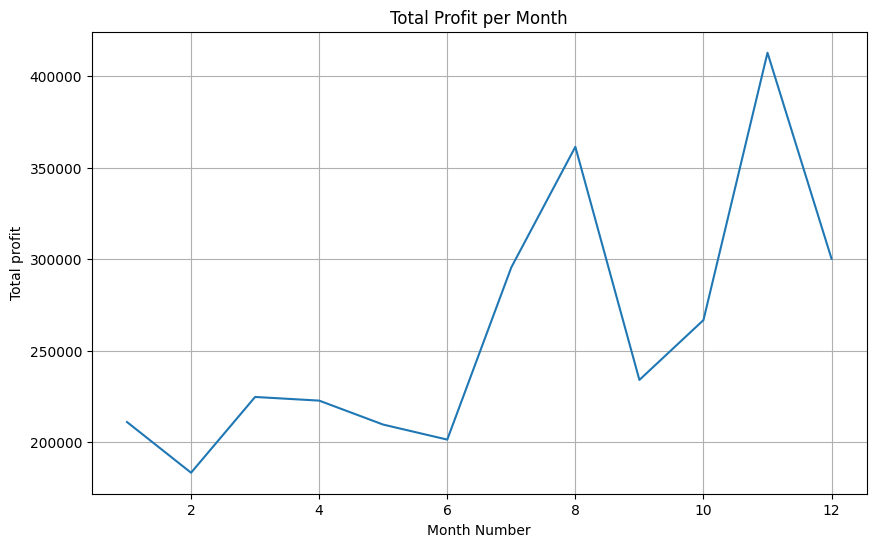

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
!wget https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv

df_sales = pd.read_csv('company_sales_data.csv')

plt.figure(figsize=(10, 6))
plt.plot(df_sales['month_number'], df_sales['total_profit'])
plt.xlabel('Month Number')
plt.ylabel('Total profit')
plt.title('Total Profit per Month')
plt.grid(True)
plt.show()

Exercise : Read face cream and facewash product sales data and show it using the bar chart \\
The bar chart should display the number of units sold per month for each product. \\
Add a separate bar for each product in the same chart.

--2025-05-20 13:10:01--  https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
Resolving pynative.com (pynative.com)... 172.66.43.37, 172.66.40.219, 2606:4700:3108::ac42:28db, ...
Connecting to pynative.com (pynative.com)|172.66.43.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659 [text/csv]
Saving to: ‘company_sales_data.csv.1’

company_sales_data. 100%[===================>]     659  --.-KB/s    in 0s      

2025-05-20 13:10:01 (273 MB/s) - ‘company_sales_data.csv.1’ saved [659/659]



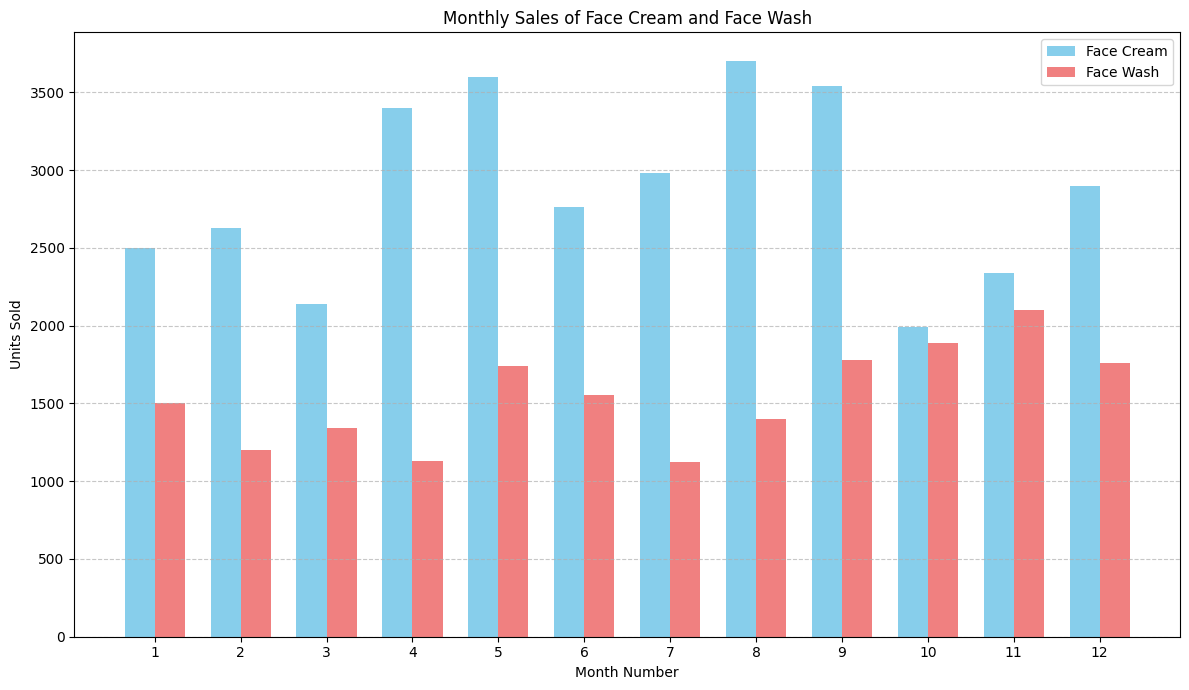

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!wget https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
df_sales = pd.read_csv('company_sales_data.csv')

months = df_sales['month_number']
facecream_sales = df_sales['facecream']
facewash_sales = df_sales['facewash']

bar_width = 0.35

x = np.arange(len(months))

plt.figure(figsize=(12, 7))

plt.bar(x - bar_width/2, facecream_sales, bar_width, label='Face Cream', color='skyblue')
plt.bar(x + bar_width/2, facewash_sales, bar_width, label='Face Wash', color='lightcoral')

plt.xlabel('Month Number')
plt.ylabel('Units Sold')
plt.title('Monthly Sales of Face Cream and Face Wash')
plt.xticks(x, months)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()